#### Notebook where I'm trying to use the Vision Transformer model from the paper: An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



### Vision Transformers

Vision Transformers (ViT) is a new model architecture that uses Transformers to perform image classification. The model is trained on ImageNet-1k dataset and achieves state-of-the-art accuracy on ImageNet-1k and CIFAR-10/100.

The model is introduced in the paper: An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale.


### Model Architecture

The model is based on the Transformer architecture. The model consists of a patching stage, followed by a linear projection and a positional encoding. The patching stage breaks down the input image into patches, which are then linearly projected into a vector of the same size as the embedding dimension. The positional encoding is added to the projected patches to retain spatial information. The output of the patching stage is then passed through a series of Transformer blocks. The Transformer blocks consist of a multi-head self-attention layer, followed by a linear layer. The output of the Transformer blocks is then passed through a classification head, which consists of a linear layer and a softmax function.

Patch Embedding

The patch embedding is the first stage of the model. The patch embedding breaks down the input image into patches, which are then linearly projected into a vector of the same size as the embedding dimension. The positional encoding is added to the projected patches to retain spatial information.

Transformer Blocks

The Transformer blocks consist of a multi-head self-attention layer, followed by a linear layer. The output of the Transformer blocks is then passed through a classification head, which consists of a linear layer and a softmax function.

In [9]:
from transformers import ViTForImageClassification, ViTFeatureExtractor
import torch
import numpy as np
import matplotlib.pyplot as plt

from torchvision import datasets
import torchvision.transforms as transforms

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.has_mps else "cpu")
device

device(type='mps')

In [29]:
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')
model.to(device)

print(model)

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0): ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_

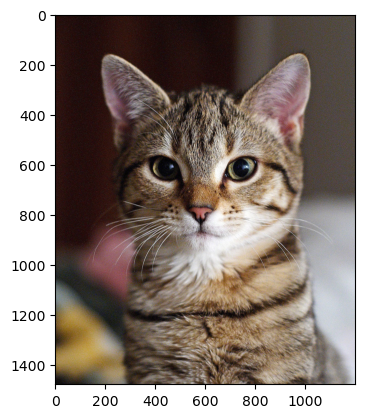

In [27]:
# try to load a sample image
from PIL import Image
import requests
from io import BytesIO

url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/1/14/Gatto_europeo4.jpg/1200px-Gatto_europeo4.jpg'
img = Image.open(requests.get(url, stream=True).raw)

plt.imshow(img)

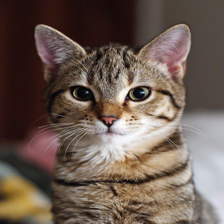

In [28]:

# resize the image
img = img.resize((224, 224))
img

In [29]:
# preprocess the image
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
inputs = feature_extractor(images=img, return_tensors="pt").to(device)

In [30]:

# run the image through the model

with torch.no_grad():
  outputs = model(**inputs)

logits = outputs.logits
logits.shape

torch.Size([1, 1000])

In [31]:
# get the predicted class
prediction = logits.argmax(-1)
print("Predicted class:", model.config.id2label[prediction.item()])

Predicted class: Egyptian cat


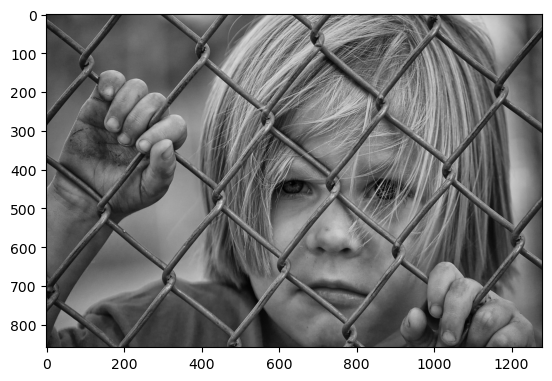

In [32]:
# check on a different image
url = 'https://cdn.pixabay.com/photo/2014/11/13/06/12/boy-529067_1280.jpg'
img = Image.open(requests.get(url, stream=True).raw)

plt.imshow(img)


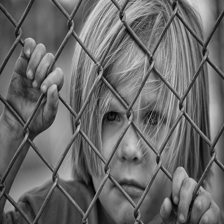

In [33]:

img = img.resize((224, 224))
img

In [34]:

feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
inputs = feature_extractor(images=img, return_tensors="pt").to(device)


with torch.no_grad():
    outputs = model(**inputs)

logits = outputs.logits
print(logits.shape)

prediction = logits.argmax(-1)
print("Predicted class:", model.config.id2label[prediction.item()])

torch.Size([1, 1000])
Predicted class: chainlink fence


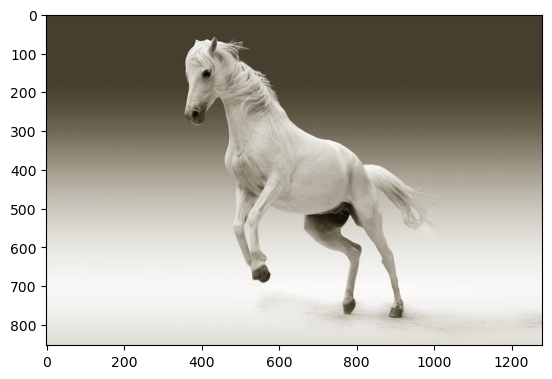

In [44]:
# one more image
url = 'https://cdn.pixabay.com/photo/2014/12/08/17/52/horse-561221_1280.jpg'
img = Image.open(requests.get(url, stream=True).raw)

plt.imshow(img)

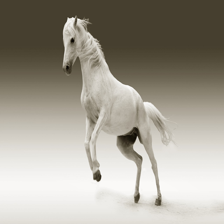

In [45]:

img = img.resize((224, 224))
img

In [46]:

feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
inputs = feature_extractor(images=img, return_tensors="pt").to(device)


with torch.no_grad():
    outputs = model(**inputs)

logits = outputs.logits
print(logits.shape)

prediction = logits.argmax(-1)
print("Predicted class:", model.config.id2label[prediction.item()])

torch.Size([1, 1000])
Predicted class: sorrel


In [10]:
# load an image from CIFAR-10

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

cifar10 = datasets.CIFAR10(root='../../../pytorch_learning/data', 
    train=False, download=False, transform=transform)

img, label = cifar10[2]
print(label)
print(img.shape)

8
torch.Size([3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


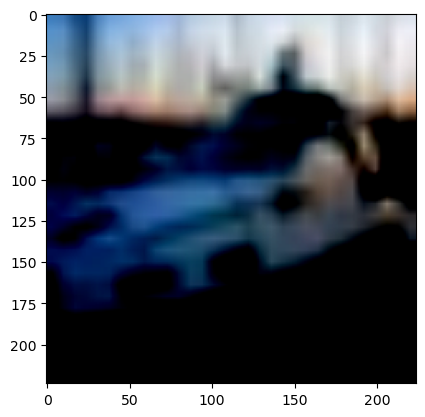

In [11]:

plt.imshow(img.permute(1, 2, 0))

In [12]:

# preprocess the image
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
inputs = feature_extractor(images=img, return_tensors="pt").to(device)


In [13]:

with torch.no_grad():
    outputs = model(**inputs)

logits = outputs.logits
print(logits.shape)

prediction = logits.argmax(-1)
print("Predicted class:", model.config.id2label[prediction.item()])

torch.Size([1, 10])
Predicted class: stingray


In [30]:
model.classifier.in_features

768

In [31]:
# train everything except the classifier
for param in model.parameters():
    param.requires_grad = False


#change the classifier to output 10 classes
model.classifier = torch.nn.Linear(model.classifier.in_features, 10)

In [32]:
model = model.to(device)
model

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0): ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_

In [17]:
# lets check the number of parameters which are trainable
params_to_update = []
for name, param in model.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)
        print("\t", name)

	 classifier.weight
	 classifier.bias


In [33]:
# train the model on CIFAR-10
from torch.utils.data import DataLoader

cifar10_train = datasets.CIFAR10(root='../../../pytorch_learning/data',
    train=True, download=False, transform=transform) 

cifar10_test = datasets.CIFAR10(root='../../../pytorch_learning/data',
    train=False, download=False, transform=transform)

train_loader = DataLoader(cifar10_train, batch_size=64, shuffle=True)
test_loader = DataLoader(cifar10_test, batch_size=64, shuffle=False)



In [34]:
# quick eval on a random sample
model.eval()
with torch.no_grad():
    for batch_idx, (data, target) in enumerate(test_loader):
        print(data.shape)
        data, target = data.to(device), target.to(device)
        output = model(data)
        print(output.logits.shape)
        break

torch.Size([64, 3, 224, 224])
torch.Size([64, 10])


In [35]:
target.shape

torch.Size([64])

In [37]:
# function for training one epoch

def train_one_epoch(net, train_loader, criterion, optimizer):
    """
    Train the network for one epoch on device
    Prints the loss as well as  accuracy every 50 batches
    returns total loss and accuracy
    """
    net.train()
    total_loss = 0
    correct = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device = device), target.to(device= device)
        output = net(data)
        loss = criterion(output.logits, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        correct_batch = torch.sum(torch.max(output.logits, 1)[1] == target).item()
        correct += correct_batch
        if batch_idx % 300 == 0:
            print('Train batch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f} \taccuracy {}/{} ({:.0f}%)'.format(
                batch_idx, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item(),
                correct_batch, len(data),
                100. * correct_batch / (len(data))))
    total_loss /= len(train_loader.dataset)
    print('Train Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format( total_loss, correct, len(train_loader.dataset),
                100. * correct / len(train_loader.dataset)))
    return total_loss, correct / len(train_loader.dataset)


# validation function
def validate(net, val_loader, criterion):
    """
    Validate the network
    Prints the loss as well as  accuracy.
    Returns total loss and accuracy
    """
    net.eval()
    total_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in val_loader:
            data, target = data.to(device), target.to(device)
            output = net(data)
            total_loss += criterion(output.logits, target).item()  # sum up batch loss
            correct += torch.sum(torch.max(output.logits, 1)[1] == target).item()
    total_loss /= len(val_loader.dataset)
    print('Validation Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format( total_loss, correct, len(val_loader.dataset),100. * correct / len(val_loader.dataset)))
    return total_loss, correct/len(val_loader.dataset)


# function to train the network for n epochs and validate after each epoch

def train(net, train_loader, val_loader, criterion, optimizer, n_epochs):
    """
    Train the network for n epochs and validate after each epoch.
    Store the loss and accuracy for each epoch and return them
    """
    # print the device used as well as specifications of the device
    print('Training on device: {}'.format(device))
    print('Training for {} epochs'.format(n_epochs))

    train_loss = []
    train_acc = []
    val_loss = []
    val_acc = []
    for epoch in range(n_epochs):
        print('Epoch {}/{}'.format(epoch, n_epochs - 1))
        print('-' * 10)
        epoch_train_loss,epoch_acc = train_one_epoch(net, train_loader, criterion, optimizer)
        train_loss.append(epoch_train_loss)
        train_acc.append(epoch_acc)
        epoch_val_loss,epoch_val_acc = validate(net, val_loader, criterion)
        val_loss.append(epoch_val_loss)
        val_acc.append(epoch_val_acc)
        print()
    return train_loss, train_acc, val_loss, val_acc    

In [38]:
# define the optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
criterion = torch.nn.CrossEntropyLoss()

# train the network
train_loss, train_acc, val_loss, val_acc = train(model, train_loader, test_loader, criterion, optimizer, n_epochs = 1)

Training on device: mps
Training for 1 epochs
Epoch 0/0
----------
Train batch: 0 [0/50000 (0%)]	Loss: 2.249940 	accuracy 8/64 (12%)
Train batch: 300 [19200/50000 (38%)]	Loss: 0.339839 	accuracy 61/64 (95%)
Train batch: 600 [38400/50000 (77%)]	Loss: 0.206859 	accuracy 62/64 (97%)
Train Average loss: 0.0074, Accuracy: 45336/50000 (91%)

Validation Average loss: 0.0028, Accuracy: 9548/10000 (95%)


